<a href="https://colab.research.google.com/github/Jaskirat1/AIT_LinearRegression/blob/main/USA_Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
df = pd.read_csv('USA_Housing.csv')

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
X = df.drop(['Address', 'Price'], axis = 1)
y= df['Price']

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(lr.coef_,X.columns,columns=["Linear Regression"])
coeff_df

,Linear Regression
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [ ]:
prd = lr.predict(X_test)

In [ ]:
prd

array([1258934.89505291,  822694.63411042, 1742214.39530122, ...,
       1452640.96473339,  645797.13026312, 1364943.76221893])

Regplot of model

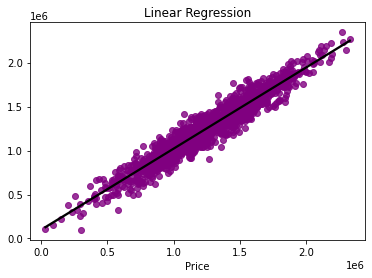

In [ ]:
#sns.regplot(x = y_test,  y =prd, kde = True, color='pink')
plt.title('Linear Regression')
sns.regplot(x=y_test,y=prd,color="purple",line_kws={"color":"black"})


Error  histogram

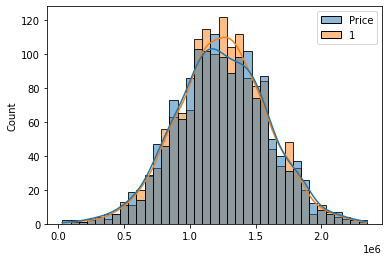

In [ ]:
sns.histplot((y_test,prd),kde=True)


Metrics(MAE,MSE,RMSE)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, prd))
print('MSE', metrics.mean_squared_error(y_test, prd))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y_test, prd)))

MAE 81257.55795855941
MSE 10169125565.897602
RMSE 285.0571135028197


Creating error dataframe

In [ ]:
index=['Linear Regression']
columns=[['MAE', 'MSE','RMSE']]
error_df = pd.DataFrame(columns = columns, index=index)
error_df

,MAE,MSE,RMSE
Linear Regression,NaN,NaN,NaN


In [ ]:
error_df.loc['Linear Regression', 'MAE'] =metrics.mean_absolute_error(y_test,prd)
error_df.loc['Linear Regression', 'MSE'] =metrics.mean_squared_error(y_test,prd)
error_df.loc['Linear Regression', 'RMSE'] =np.sqrt(metrics.mean_absolute_error(y_test,prd))

In [ ]:
error_df

,MAE,MSE,RMSE
Linear Regression,81257.557959,10169125565.897602,285.057114
